In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim

In [2]:
# 定义数据
x = torch.rand([50, 1])
y = (x-1)*(x-1)+(x-2)*(x-2)+(x-3)*(x-3)
# y = 3 * x + 0.8
x

tensor([[0.4874],
        [0.4480],
        [0.1967],
        [0.1948],
        [0.6931],
        [0.5393],
        [0.8374],
        [0.1655],
        [0.4487],
        [0.2541],
        [0.6391],
        [0.7980],
        [0.2284],
        [0.0359],
        [0.6547],
        [0.4101],
        [0.5538],
        [0.0926],
        [0.9990],
        [0.1454],
        [0.1258],
        [0.4214],
        [0.1851],
        [0.5028],
        [0.1237],
        [0.1744],
        [0.1118],
        [0.8267],
        [0.4174],
        [0.9723],
        [0.8715],
        [0.0874],
        [0.1813],
        [0.5174],
        [0.1225],
        [0.5907],
        [0.7299],
        [0.5480],
        [0.4555],
        [0.1146],
        [0.2374],
        [0.8063],
        [0.9537],
        [0.0801],
        [0.3040],
        [0.3675],
        [0.9036],
        [0.6069],
        [0.8988],
        [0.4629]])

In [3]:
# 定义模型
class Lr(nn.Module):
    def __init__(self):
        super(Lr, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        out = self.linear(x)
        return out


# 实例化模型、loss、优化器
model = Lr()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

# 训练模型
for i in range(30000):
    out = model(x) # 获取预测值
    loss = criterion(y,out) # 计算损失
    optimizer.zero_grad() # 梯度归零
    loss.backward() # 计算梯度
    optimizer.step() # 更新梯度

    if(i+1)%20 == 0:
        print('Epoch[{}/{}],loss: {:.6f}'.format(i,30000,loss.data))


Epoch[19/30000],loss: 76.909538
Epoch[39/30000],loss: 70.876686
Epoch[59/30000],loss: 65.398445
Epoch[79/30000],loss: 60.423306
Epoch[99/30000],loss: 55.904575
Epoch[119/30000],loss: 51.799873
Epoch[139/30000],loss: 48.070755
Epoch[159/30000],loss: 44.682362
Epoch[179/30000],loss: 41.603092
Epoch[199/30000],loss: 38.804234
Epoch[219/30000],loss: 36.259762
Epoch[239/30000],loss: 33.946087
Epoch[259/30000],loss: 31.841780
Epoch[279/30000],loss: 29.927431
Epoch[299/30000],loss: 28.185417
Epoch[319/30000],loss: 26.599754
Epoch[339/30000],loss: 25.155954
Epoch[359/30000],loss: 23.840870
Epoch[379/30000],loss: 22.642559
Epoch[399/30000],loss: 21.550188
Epoch[419/30000],loss: 20.553980
Epoch[439/30000],loss: 19.645008
Epoch[459/30000],loss: 18.815197
Epoch[479/30000],loss: 18.057219
Epoch[499/30000],loss: 17.364433
Epoch[519/30000],loss: 16.730799
Epoch[539/30000],loss: 16.150862
Epoch[559/30000],loss: 15.619647
Epoch[579/30000],loss: 15.132666
Epoch[599/30000],loss: 14.685839
Epoch[619/30000

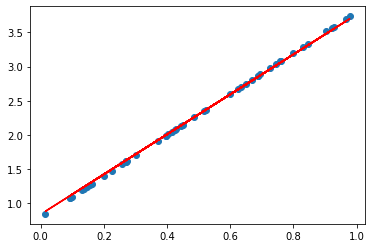

In [19]:
# 模型评估
model.eval()
predict = model(x)
predict = predict.data.numpy()
plt.scatter(x.data.numpy(),y.data.numpy())
plt.plot(x.data.numpy(),predict,c='r')
plt.show()